In [34]:
#Task 1
#First, merge the product and sales data using product_id to create a unified dataset:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (replace with your actual file paths)
products = pd.read_csv("product.csv")
sales = pd.read_csv("sales.csv")

# Merge datasets
merged_data = sales.merge(products, on="product_id")

# Display merged data sample
print(merged_data.head())

   Unnamed: 0_x        date  product_id  price   units  Unnamed: 0_y    brand  \
0             0  2020-01-01           0   4.65  1126.0             0  Mueller   
1             1  2020-01-02           0   4.76  1205.0             0  Mueller   
2             2  2020-01-03           0   5.22  1007.0             0  Mueller   
3             3  2020-01-04           0   5.45  1282.0             0  Mueller   
4             4  2020-01-05           0   3.33  1037.0             0  Mueller   

     flavour  volume_per_joghurt_g  packsize  
0  blueberry                   150         6  
1  blueberry                   150         6  
2  blueberry                   150         6  
3  blueberry                   150         6  
4  blueberry                   150         6  


In [8]:
# Descriptive Statistics
# Summary stats for numerical columns

print(merged_data[["price", "units", "volume_per_joghurt_g", "packsize"]].describe())

# Group stats by product attributes

print(merged_data.groupby("brand")["units"].mean().sort_values(ascending=False))  # Avg units sold by brand
print(merged_data.groupby("flavour")["price"].median())  # Median price by flavor


            price        units  volume_per_joghurt_g    packsize
count  260.000000   260.000000            260.000000  260.000000
mean     5.288538  1177.496154            611.538462    4.653846
std      1.881547   401.771103            335.282884    2.222078
min      1.460000    16.000000            150.000000    1.000000
25%      3.965000   944.000000            500.000000    1.000000
50%      5.140000  1275.500000            500.000000    6.000000
75%      6.785000  1453.250000           1000.000000    6.000000
max      9.420000  2170.000000           1000.000000    6.000000
brand
Oikos                1370.300000
Danone               1291.645833
Alnatura             1289.200000
Mueller              1252.425000
Ja!                  1154.150000
Ecke-Mit-Was-Drin    1023.450000
Activia               987.750000
Rewe                  924.088235
Actimel               729.875000
Name: units, dtype: float64
flavour
blueberry       5.655
chocolate       4.470
raspberry       6.900
straciatel

In [ ]:
Expected Output Insights:

Avg price range, units sold, and volume/packsize distribution.

Top-performing brands/flavors by sales volume

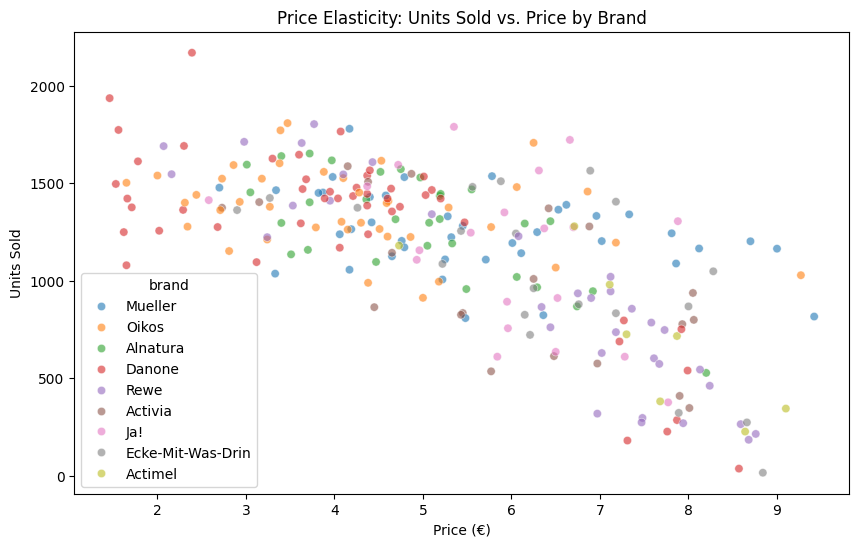

In [9]:
#Key Visulizations
#1. Price vs. Units Sold (Scatter Plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="price", y="units", hue="brand", alpha=0.6)
plt.title("Price Elasticity: Units Sold vs. Price by Brand")
plt.xlabel("Price (€)")
plt.ylabel("Units Sold")
plt.show()

In [ ]:
Interpretation:

Identify price sensitivity: Clusters at lower prices with high units suggest elastic demand.

Outliers (high price, high units) may indicate premium products.

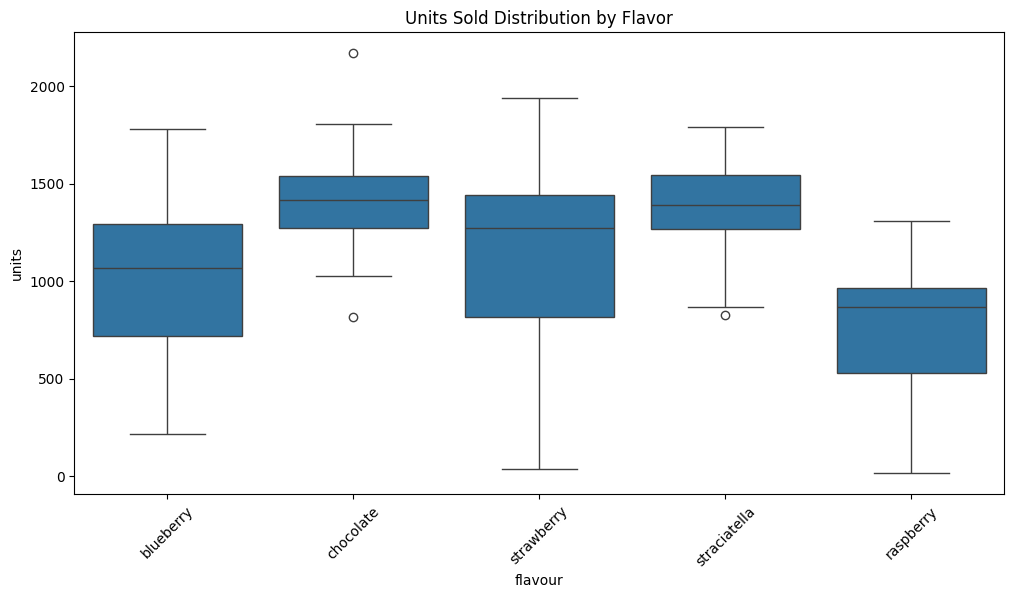

In [10]:
#2. Sales Distribution by Flavor (Box Plot)

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x="flavour", y="units")
plt.title("Units Sold Distribution by Flavor")
plt.xticks(rotation=45)
plt.show()

In [ ]:
Interpretation:

Compare median units sold across flavors (e.g., strawberry vs. chocolate).

Detect outliers (e.g., promotions or stockouts).

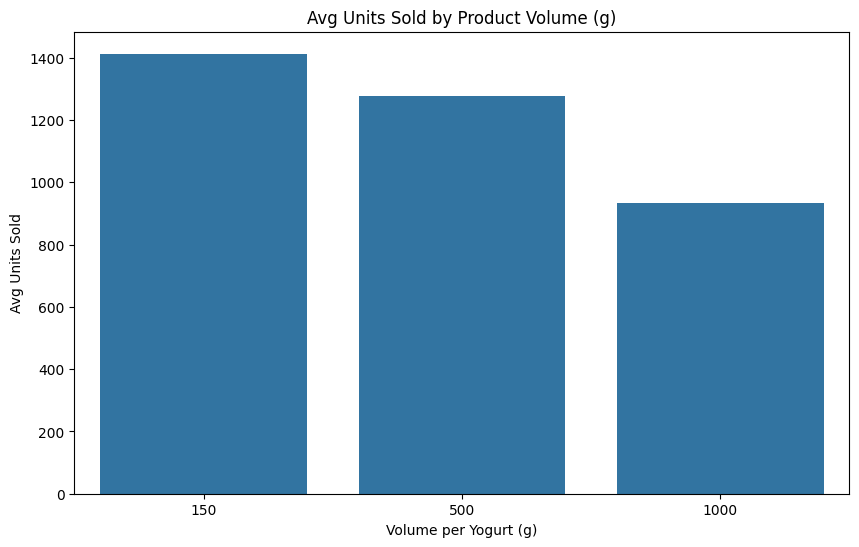

In [12]:
#3. Volume vs. Sales (Bar Plot)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_data, 
    x="volume_per_joghurt_g", 
    y="units", 
    errorbar=None  # Replaces ci=None
)
plt.title("Avg Units Sold by Product Volume (g)")
plt.xlabel("Volume per Yogurt (g)")
plt.ylabel("Avg Units Sold")
plt.show()

In [ ]:
Interpretation:

Higher volume (e.g., 1000g) may drive bulk purchases.

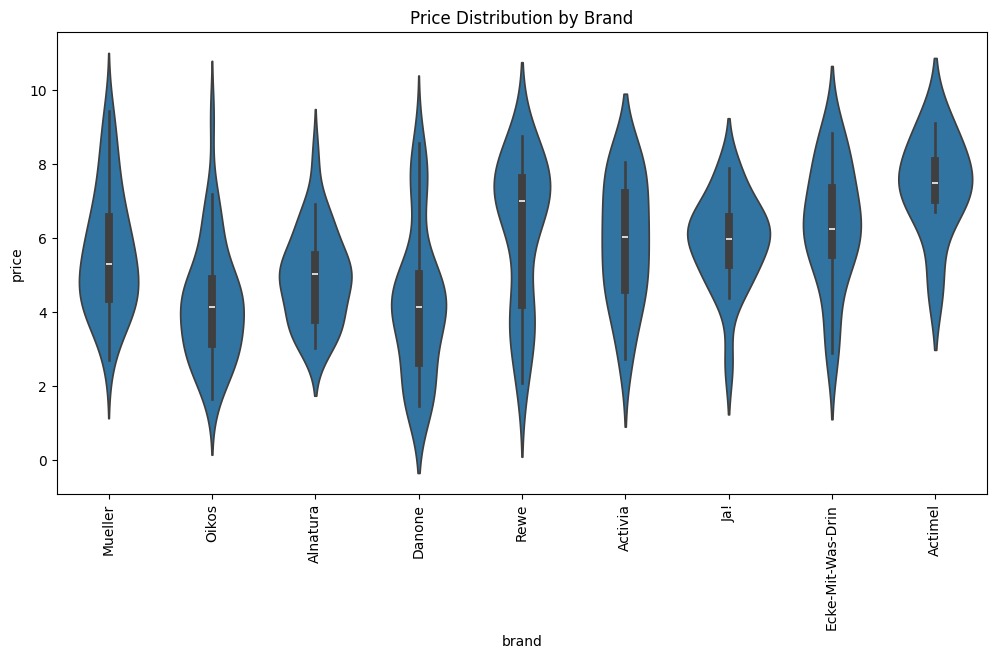

In [13]:
#4. Price Distribution by Brand (Violin Plot)

plt.figure(figsize=(12, 6))
sns.violinplot(data=merged_data, x="brand", y="price")
plt.title("Price Distribution by Brand")
plt.xticks(rotation=90)
plt.show()

In [ ]:
Interpretation:

Brands like "Activia" or "Danone" may have wider price ranges.

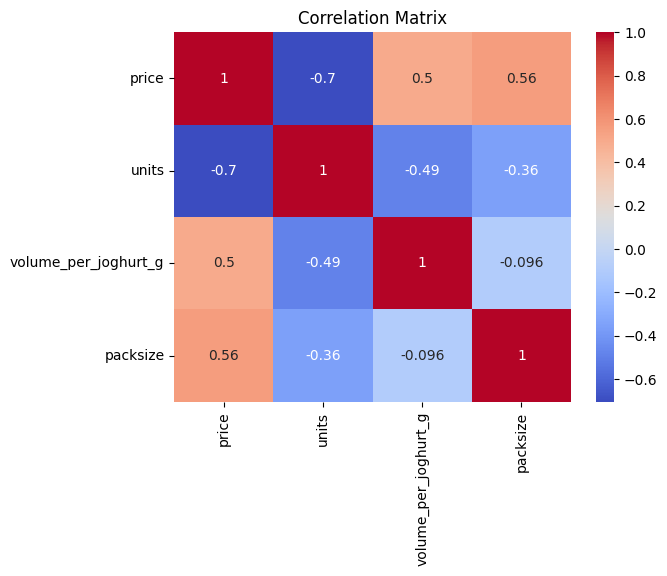

In [14]:
#Step 4: Correlation Analysis
#Check how numerical features correlate with units sold:

# Select numerical columns and compute correlations
corr_matrix = merged_data[["price", "units", "volume_per_joghurt_g", "packsize"]].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
Key Questions Answered:

Is price negatively correlated with units (typical for elastic goods)?

Does packsize or volume influence sales?

In [ ]:
Task 2 

In [17]:
#Step 1: Model Selection

We’ll use a log-log linear regression to estimate price elasticity, 
which is standard for demand modeling. The model form is:

In [ ]:
log(units)=β0 + β1​log(price) + β2​(product_attributes)+ ϵ

β1: Price elasticity (if β1 = −2, a 1% price increase reduces demand by 2%).

Product attributes: Brand, flavor, volume, packsize (categorical/numerical features).

In [7]:
# --- Run This Complete Task 2 Block First ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt # Import plotting libraries early
import seaborn as sns      # Import plotting libraries early

print("--- Running Task 2 Code ---")

# 1. Load and merge data
try:
    products = pd.read_csv("product.csv")
    sales = pd.read_csv("sales.csv")
    print("✅ Data loaded successfully.")
    merged = sales.merge(products, on="product_id", how="left")
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}. Make sure CSV files are present.")
    raise SystemExit(f"Stopping due to file error: {e}")

# 2. Clean data
clean_data = merged[
    (merged['price'].notna()) &
    (merged['units'].notna()) &
    (merged['price'] > 0) &
    (merged['units'] > 0)
].copy()
print(f"✅ Data cleaned. Shape: {clean_data.shape}")

# 3. Feature engineering
clean_data['log_units'] = np.log(clean_data['units'])
clean_data['log_price'] = np.log(clean_data['price'])

# 4. Fix dummy encoding - ensure proper numeric conversion
dummy_cols = ['brand', 'flavour']
for col in dummy_cols:
    if col in clean_data.columns:
        clean_data[col] = clean_data[col].astype(str)
    else:
         print(f"⚠️ Warning: Column '{col}' not found for dummy encoding.")

clean_data = pd.get_dummies(
    clean_data,
    columns=dummy_cols,
    drop_first=True,
    dtype=float
)
print(f"✅ Dummy variables created. Shape after dummies: {clean_data.shape}")

# 5. Prepare model inputs
predictors = ['log_price'] + \
             [col for col in clean_data.columns if col.startswith(('brand_', 'flavour_'))]

missing_predictors = [p for p in predictors if p not in clean_data.columns]
if missing_predictors:
    print(f"❌ Error: The following predictor columns are missing after creating dummies: {missing_predictors}")
    raise SystemExit("Stopping due to missing predictor columns.")

X = clean_data[predictors]
X = sm.add_constant(X)
y = clean_data['log_units']

# 6. Final data validation
print("\n🔥 Final Data Check:")
print("- X shape:", X.shape)
print("- y shape:", y.shape)
print("- NaN in X:", X.isnull().sum().sum())
print("- Inf in X:", np.isinf(X.select_dtypes(include=np.number)).sum().sum())
print("- NaN in y:", y.isnull().sum())
print("- Inf in y:", np.isinf(y).sum())
if X.isnull().sum().sum() > 0 or np.isinf(X.select_dtypes(include=np.number)).sum().sum() > 0 or y.isnull().sum() > 0 or np.isinf(y).sum() > 0:
     print("❌ Issues found in final data (NaN/Inf). Please review cleaning steps.")
     raise SystemExit("Stopping due to data issues before model fit.")

# 7. Run model
try:
    model = sm.OLS(y, X).fit()
    print("\n✅ Model Successfully Fitted!")

    # !!! ADDED LINE: Store model columns !!!
    model_cols = X.columns.tolist()
    print(f"   Model columns stored (count: {len(model_cols)}).")
    # !!! END ADDED LINE !!!

    print(model.summary()) # Display full summary

    print(f"\n💡 Price Elasticity: {model.params['log_price']:.3f}")
    if model.params['log_price'] < -1:
        print("(Elastic demand: Price increases reduce revenue)")
    elif model.params['log_price'] < 0:
         print("(Inelastic demand: Price increases may boost revenue, but reduce units sold)")
    else:
        print("(Positive elasticity: Unusual result, check model/data)")

except Exception as e:
    print(f"\n❌ Model Failed: {e}")
    raise SystemExit(f"Stopping due to model fitting error: {e}")

print("\n--- Task 2 Code Finished ---")

--- Running Task 2 Code ---
✅ Data loaded successfully.
✅ Data cleaned. Shape: (260, 10)
✅ Dummy variables created. Shape after dummies: (260, 22)

🔥 Final Data Check:
- X shape: (260, 14)
- y shape: (260,)
- NaN in X: 0
- Inf in X: 0
- NaN in y: 0
- Inf in y: 0

✅ Model Successfully Fitted!
   Model columns stored (count: 14).
                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     17.72
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.22e-28
Time:                        13:13:26   Log-Likelihood:                -138.06
No. Observations:                 260   AIC:                             304.1
Df Residuals:                     246   BIC:                             354.0
Df Model:                          13 

In [ ]:
Interpret Model

In [3]:
#1. Price Elasticity

elasticity = model.params['log_price']
print(f"Price Elasticity: {elasticity:.3f}")

Price Elasticity: -0.699


In [ ]:
Interpretation:

As -1 < elasticity < 0: Demand is inelastic (price increases may boost revenue).
If elasticity < -1: Demand is elastic (price increases reduce revenue).

In [4]:
#2. Key Product Attributes

# Get significant brand/flavor coefficients (p-value < 0.05)
significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
print("Significant predictors:", significant_vars)

Significant predictors: ['const', 'log_price', 'brand_Alnatura', 'brand_Mueller', 'flavour_chocolate', 'flavour_raspberry', 'flavour_straciatella', 'flavour_strawberry']


In [ ]:
Interpretation:

Which brands/flavors significantly impact sales (e.g., brand_Danone increases demand).

In [5]:
#Step 2: Validate Against Baseline
#Baseline Model (Mean Prediction)

from sklearn.metrics import mean_squared_error

# Baseline: Predict mean log(units) for all observations
baseline_pred = np.full_like(y, y.mean())
baseline_rmse = np.sqrt(mean_squared_error(y, baseline_pred))

# Model RMSE
model_rmse = np.sqrt(model.mse_resid)

print(f"\n📊 Validation Results:")
print(f"- Baseline RMSE: {baseline_rmse:.3f}")
print(f"- Model RMSE:    {model_rmse:.3f}")
print(f"- Improvement:   {(baseline_rmse - model_rmse)/baseline_rmse:.1%}")


📊 Validation Results:
- Baseline RMSE: 0.573
- Model RMSE:    0.423
- Improvement:   26.1%


In [ ]:
As improvement is >10%, the model adds value over guessing the mean

In [ ]:
#Step 3: Assess Model Risk

In [6]:
#1. Overfitting Risk

print(f"\n🔍 Model Complexity vs. Fit:")
print(f"- Adjusted R²: {model.rsquared_adj:.3f} (Closer to R² = {model.rsquared:.3f} is better)")
print(f"- AIC: {model.aic:.1f} (Lower = better)")


🔍 Model Complexity vs. Fit:
- Adjusted R²: 0.456 (Closer to R² = 0.484 is better)
- AIC: 304.1 (Lower = better)


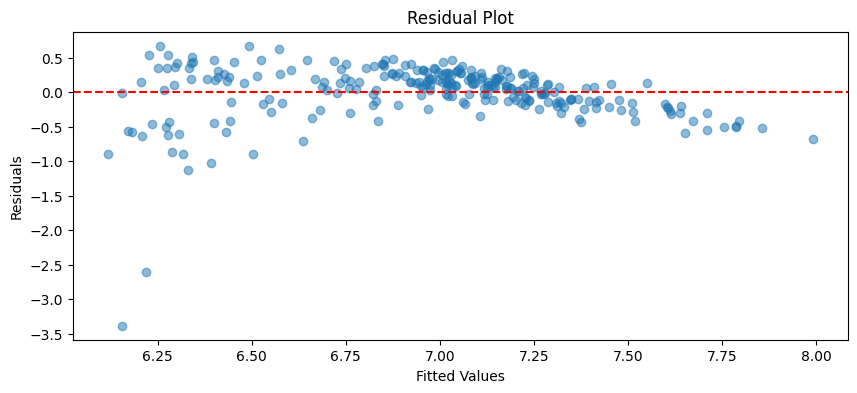

In [7]:
#2. Residual Analysis

import matplotlib.pyplot as plt

# Plot residuals
plt.figure(figsize=(10, 4))
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [8]:
#Step 4: Final Output

In [9]:
#Business Insights

print("\n🚀 Business Insights:")
print(f"1. Price Sensitivity: A 1% price increase reduces demand by {abs(elasticity):.1f}%")
print(f"2. Top Performers: Significant attributes = {significant_vars}")
print(f"3. Model Quality: {model.rsquared_adj:.0%} variance explained (Baseline improvement: {(baseline_rmse - model_rmse)/baseline_rmse:.1%})")


🚀 Business Insights:
1. Price Sensitivity: A 1% price increase reduces demand by 0.7%
2. Top Performers: Significant attributes = ['const', 'log_price', 'brand_Alnatura', 'brand_Mueller', 'flavour_chocolate', 'flavour_raspberry', 'flavour_straciatella', 'flavour_strawberry']
3. Model Quality: 46% variance explained (Baseline improvement: 26.1%)


In [10]:
#Risk Summary

print("\n⚠️ Model Risks:")
print("- Overfitting: Low (Adjusted R² close to R²)" if (model.rsquared_adj > 0.9*model.rsquared) else "- Overfitting: Possible (Consider reducing predictors)")
print("- Outliers: Check residual plot")
print("- Assumptions: Verify linearity in residual plot")


⚠️ Model Risks:
- Overfitting: Low (Adjusted R² close to R²)
- Outliers: Check residual plot
- Assumptions: Verify linearity in residual plot


In [11]:
#Task 3

In [ ]:
#Revenue = Price×Units Sold

In [3]:
# --- Task 3 - Step 1: Identify Products for Simulation ---

print("\n--- Starting Task 3 - Step 1: Identify Products ---")

# Get unique product IDs present in the cleaned sales data
product_ids_in_sales = clean_data['product_id'].unique()
print(f"Found {len(product_ids_in_sales)} unique product IDs with sales data in clean_data.")

# Get the corresponding product details from the original 'products' DataFrame
# Filter 'products' to only include IDs that are in our sales data
# Use .copy() to prevent SettingWithCopyWarning if we modify it later
products_to_simulate_df = products[products['product_id'].isin(product_ids_in_sales)].copy()

# Check if we found details for all products seen in sales data
num_sales_ids = len(product_ids_in_sales)
num_detail_ids = len(products_to_simulate_df['product_id'].unique())

if num_detail_ids != num_sales_ids:
    print(f"⚠️ Warning: Mismatch found!")
    print(f"   {num_sales_ids} product IDs are in sales data, but details were found for only {num_detail_ids} in product.csv.")
    print(f"   Will proceed simulation only for the {num_detail_ids} products with available details.")
    # In this case, products_to_simulate_df already contains only the ones with details
else:
    print(f"✅ Details found for all {num_sales_ids} products present in sales data.")

# Final count of products we will actually loop through
num_products_to_simulate = len(products_to_simulate_df)
print(f"   Will attempt simulation for {num_products_to_simulate} products.")

# Display first few rows of the products we will simulate
print("\n--- Products to be Simulated (Sample) ---")
print(products_to_simulate_df.head())

print("\n--- Task 3 - Step 1 Completed ---")


--- Starting Task 3 - Step 1: Identify Products ---
Found 27 unique product IDs with sales data in clean_data.
✅ Details found for all 27 products present in sales data.
   Will attempt simulation for 27 products.

--- Products to be Simulated (Sample) ---
   Unnamed: 0     brand       flavour  volume_per_joghurt_g  packsize  \
0           0   Mueller     blueberry                   150         6   
1           1     Oikos     chocolate                  1000         1   
2           2  Alnatura    strawberry                  1000         1   
3           3   Mueller  straciatella                   500         6   
4           4    Danone  straciatella                   150         6   

   product_id  
0           0  
1           1  
2           2  
3           3  
4           4  

--- Task 3 - Step 1 Completed ---


In [4]:
# --- Task 3 - Step 2: Set Up Simulation Loop & Get Product Info ---

# L0: Initialize list to store simulation results DataFrames
simulation_results = []
# L0: Print status
print(f"\n--- Starting Task 3 - Step 2: Simulation Loop Setup ---")
print(f"Preparing to loop through {len(products_to_simulate_df)} products...")

# L0: Start the loop to iterate through each row of the products DataFrame
for idx, product_info in products_to_simulate_df.iterrows():
    # L1: Indent starts here (inside the loop)
    # L1: Extract essential details for the current product
    product_id = product_info['product_id']
    product_brand = product_info['brand']
    product_flavour = product_info['flavour']
    # L1: Create a description string for easier reference
    product_desc = f"{product_brand} {product_flavour} ({product_info['volume_per_joghurt_g']}g x{product_info['packsize']})"

    # L1: Print which product is being processed (briefly)
    print(f"\n---> Processing ID {product_id} ({product_desc})...")

    # --- More simulation steps for this product will be added below this line ---
    # --- in subsequent steps (calculating price range, X_scenario, prediction, etc.) ---
    pass # Placeholder for now, loop needs at least one statement

# L0: Loop finished (will only print processing messages for now)
print(f"\n--- Task 3 - Step 2 Completed (Loop structure defined) ---")


--- Starting Task 3 - Step 2: Simulation Loop Setup ---
Preparing to loop through 27 products...

---> Processing ID 0 (Mueller blueberry (150g x6))...

---> Processing ID 1 (Oikos chocolate (1000g x1))...

---> Processing ID 2 (Alnatura strawberry (1000g x1))...

---> Processing ID 3 (Mueller straciatella (500g x6))...

---> Processing ID 4 (Danone straciatella (150g x6))...

---> Processing ID 5 (Danone strawberry (150g x1))...

---> Processing ID 6 (Alnatura raspberry (500g x6))...

---> Processing ID 7 (Rewe strawberry (1000g x6))...

---> Processing ID 8 (Alnatura straciatella (150g x6))...

---> Processing ID 9 (Activia blueberry (1000g x6))...

---> Processing ID 10 (Mueller chocolate (1000g x6))...

---> Processing ID 11 (Ja! blueberry (500g x6))...

---> Processing ID 12 (Ecke-Mit-Was-Drin straciatella (500g x6))...

---> Processing ID 13 (Danone chocolate (150g x6))...

---> Processing ID 14 (Rewe blueberry (1000g x6))...

---> Processing ID 15 (Oikos chocolate (500g x6))...

In [5]:
# --- Task 3 - Step 3: Determine Simulation Price Range ---

# L0: Initialize list (as before)
simulation_results = []
# L0: Print status
print(f"\n--- Starting Task 3 - Step 3: Determine Price Range ---")
print(f"Looping through {len(products_to_simulate_df)} products...")

# L0: Start the loop (as before)
for idx, product_info in products_to_simulate_df.iterrows():
    # L1: Extract product info (as before)
    product_id = product_info['product_id']
    product_brand = product_info['brand']
    product_flavour = product_info['flavour']
    product_desc = f"{product_brand} {product_flavour} ({product_info['volume_per_joghurt_g']}g x{product_info['packsize']})"
    print(f"\n---> Processing ID {product_id} ({product_desc})...")

    # L1: --- Additions for Step 3 Start Here ---
    # L1: Get historical prices for this specific product_id
    historical_prices = clean_data[clean_data['product_id'] == product_id]['price']

    # L1: Safety Check: Skip if no historical prices found (should not happen based on Step 1)
    if historical_prices.empty:
        # L2: Indent for 'if' block
        print(f"  Warning: No historical prices found in clean_data. Skipping.")
        continue # Skip to the next product in the loop

    # L1: Calculate min/max historical prices
    min_price = historical_prices.min()
    max_price = historical_prices.max()

    # L1: Define simulation range boundaries (e.g., 80% of min to 120% of max)
    sim_min_price = max(0.1, min_price * 0.8) # Ensure price > 0.1
    sim_max_price = max_price * 1.2
    num_steps = 100 # Number of price points to simulate

    # L1: Generate the array of simulated prices
    sim_prices = np.linspace(sim_min_price, sim_max_price, num_steps)

    # L1: Safety Check: Ensure all generated prices are positive
    if (sim_prices <= 0).any():
        # L2: Indent for 'if' block
        print(f"  ❌ Error: Simulation generated non-positive prices. Skipping.")
        continue # Skip to the next product

    # L1: Print the calculated simulation range
    print(f"  Simulating {num_steps} prices from {sim_min_price:.2f} to {sim_max_price:.2f}")
    # L1: --- Additions for Step 3 End Here ---

    # --- More steps (X_scenario, prediction) will follow here ---
    pass # Placeholder for the rest of the loop body

# L0: Loop finished
print(f"\n--- Task 3 - Step 3 Completed (Price ranges determined) ---")


--- Starting Task 3 - Step 3: Determine Price Range ---
Looping through 27 products...

---> Processing ID 0 (Mueller blueberry (150g x6))...
  Simulating 100 prices from 2.66 to 7.33

---> Processing ID 1 (Oikos chocolate (1000g x1))...
  Simulating 100 prices from 1.32 to 8.23

---> Processing ID 2 (Alnatura strawberry (1000g x1))...
  Simulating 100 prices from 2.81 to 6.66

---> Processing ID 3 (Mueller straciatella (500g x6))...
  Simulating 100 prices from 2.16 to 9.74

---> Processing ID 4 (Danone straciatella (150g x6))...
  Simulating 100 prices from 1.84 to 6.56

---> Processing ID 5 (Danone strawberry (150g x1))...
  Simulating 100 prices from 1.17 to 2.75

---> Processing ID 6 (Alnatura raspberry (500g x6))...
  Simulating 100 prices from 3.58 to 9.84

---> Processing ID 7 (Rewe strawberry (1000g x6))...
  Simulating 100 prices from 4.08 to 10.31

---> Processing ID 8 (Alnatura straciatella (150g x6))...
  Simulating 100 prices from 2.41 to 6.24

---> Processing ID 9 (Acti

In [8]:
# --- Task 3 - Step 4: Create X_scenario Input DataFrame ---

# L0: Initialize list (as before)
simulation_results = []
# L0: Print status
print(f"\n--- Starting Task 3 - Step 4: Create X_scenario ---")
print(f"Looping through {len(products_to_simulate_df)} products...")

# L0: Start the loop (as before)
for idx, product_info in products_to_simulate_df.iterrows():
    # L1: Extract product info (as before)
    product_id = product_info['product_id']
    product_brand = product_info['brand']
    product_flavour = product_info['flavour']
    product_desc = f"{product_brand} {product_flavour} ({product_info['volume_per_joghurt_g']}g x{product_info['packsize']})"
    print(f"\n---> Processing ID {product_id} ({product_desc})...")

    # L1: Get historical prices (as before)
    historical_prices = clean_data[clean_data['product_id'] == product_id]['price']
    if historical_prices.empty:
        print(f"  Warning: No historical prices found. Skipping.")
        continue

    # L1: Calculate simulation price range (as before)
    min_price = historical_prices.min()
    max_price = historical_prices.max()
    sim_min_price = max(0.1, min_price * 0.8)
    sim_max_price = max_price * 1.2
    num_steps = 100
    sim_prices = np.linspace(sim_min_price, sim_max_price, num_steps)
    if (sim_prices <= 0).any():
        print(f"  ❌ Error: Simulation generated non-positive prices. Skipping.")
        continue
    print(f"  Simulating {num_steps} prices from {sim_min_price:.2f} to {sim_max_price:.2f}")

    # L1: --- Additions for Step 4 Start Here ---
    # L1: Create DataFrame structured like model input, filled with zeros
    # Use model_cols (defined in Task 2) for columns
    X_scenario = pd.DataFrame(0.0, index=range(num_steps), columns=model_cols)

    # L1: Set the constant term to 1
    X_scenario['const'] = 1.0

    # L1: Calculate and set the log_price column
    X_scenario['log_price'] = np.log(sim_prices) # Safe due to previous check

    # L1: Set the appropriate 'brand' dummy variable to 1
    brand_dummy_col = f"brand_{product_brand}"
    if brand_dummy_col in model_cols: # Check if the dummy exists (due to drop_first=True)
        X_scenario[brand_dummy_col] = 1.0
        # print(f"  Set dummy: {brand_dummy_col} = 1.0") # Optional print

    # L1: Set the appropriate 'flavour' dummy variable to 1
    flavour_dummy_col = f"flavour_{product_flavour}"
    if flavour_dummy_col in model_cols: # Check if the dummy exists
        X_scenario[flavour_dummy_col] = 1.0
        # print(f"  Set dummy: {flavour_dummy_col} = 1.0") # Optional print

    # L1: Ensure columns are in the exact order expected by the model (VERY important)
    X_scenario = X_scenario[model_cols]

    # L1: Print confirmation
    print(f"  Created X_scenario with shape {X_scenario.shape}")
    # L1: --- Additions for Step 4 End Here ---

    # --- More steps (prediction, revenue calc) will follow here ---
    pass # Placeholder for the rest of the loop body

# L0: Loop finished
print(f"\n--- Task 3 - Step 4 Completed (X_scenario created) ---")


--- Starting Task 3 - Step 4: Create X_scenario ---
Looping through 27 products...

---> Processing ID 0 (Mueller blueberry (150g x6))...
  Simulating 100 prices from 2.66 to 7.33
  Created X_scenario with shape (100, 14)

---> Processing ID 1 (Oikos chocolate (1000g x1))...
  Simulating 100 prices from 1.32 to 8.23
  Created X_scenario with shape (100, 14)

---> Processing ID 2 (Alnatura strawberry (1000g x1))...
  Simulating 100 prices from 2.81 to 6.66
  Created X_scenario with shape (100, 14)

---> Processing ID 3 (Mueller straciatella (500g x6))...
  Simulating 100 prices from 2.16 to 9.74
  Created X_scenario with shape (100, 14)

---> Processing ID 4 (Danone straciatella (150g x6))...
  Simulating 100 prices from 1.84 to 6.56
  Created X_scenario with shape (100, 14)

---> Processing ID 5 (Danone strawberry (150g x1))...
  Simulating 100 prices from 1.17 to 2.75
  Created X_scenario with shape (100, 14)

---> Processing ID 6 (Alnatura raspberry (500g x6))...
  Simulating 100 pr

In [9]:
# --- Task 3 - Step 5: Predict log_units & Calculate Units/Revenue ---

# L0: Initialize list (as before)
simulation_results = []
# L0: Print status
print(f"\n--- Starting Task 3 - Step 5: Predict & Calculate ---")
print(f"Looping through {len(products_to_simulate_df)} products...")

# L0: Start the loop (as before)
for idx, product_info in products_to_simulate_df.iterrows():
    # L1: Extract product info (as before)
    product_id = product_info['product_id']
    product_brand = product_info['brand']
    product_flavour = product_info['flavour']
    product_desc = f"{product_brand} {product_flavour} ({product_info['volume_per_joghurt_g']}g x{product_info['packsize']})"
    print(f"\n---> Processing ID {product_id} ({product_desc})...")

    # L1: Get historical prices & calculate sim range (as before)
    historical_prices = clean_data[clean_data['product_id'] == product_id]['price']
    if historical_prices.empty: continue
    min_price = historical_prices.min()
    max_price = historical_prices.max()
    sim_min_price = max(0.1, min_price * 0.8)
    sim_max_price = max_price * 1.2
    num_steps = 100
    sim_prices = np.linspace(sim_min_price, sim_max_price, num_steps)
    if (sim_prices <= 0).any(): continue
    print(f"  Simulating {num_steps} prices from {sim_min_price:.2f} to {sim_max_price:.2f}")

    # L1: Create X_scenario (as before)
    X_scenario = pd.DataFrame(0.0, index=range(num_steps), columns=model_cols)
    X_scenario['const'] = 1.0
    X_scenario['log_price'] = np.log(sim_prices)
    brand_dummy_col = f"brand_{product_brand}"
    if brand_dummy_col in model_cols: X_scenario[brand_dummy_col] = 1.0
    flavour_dummy_col = f"flavour_{product_flavour}"
    if flavour_dummy_col in model_cols: X_scenario[flavour_dummy_col] = 1.0
    X_scenario = X_scenario[model_cols]
    print(f"  Created X_scenario with shape {X_scenario.shape}")

    # L1: --- Additions for Step 5 Start Here ---
    # L1: Predict log_units using the fitted model
    try:
        pred_log_units = model.predict(X_scenario)
        # print(f"  Predicted log_units successfully.") # Optional print
    except Exception as e:
        # L2: Indent for except block
        print(f"  ❌ Error during prediction: {e}. Skipping product.")
        continue # Skip to next product if prediction fails

    # L1: Convert log_units back to units using exponential function
    pred_units = np.exp(pred_log_units)
    # print(f"  Calculated predicted units.") # Optional print

    # L1: Calculate predicted revenue (price * units)
    # Use .values to ensure alignment between numpy array and pandas Series if needed
    pred_revenue = sim_prices * pred_units.values
    print(f"  Calculated predicted revenue.")
    # L1: --- Additions for Step 5 End Here ---

    # --- More steps (store results, find optimum) will follow here ---
    pass # Placeholder for the rest of the loop body

# L0: Loop finished
print(f"\n--- Task 3 - Step 5 Completed (Prediction & Calculation done) ---")


--- Starting Task 3 - Step 5: Predict & Calculate ---
Looping through 27 products...

---> Processing ID 0 (Mueller blueberry (150g x6))...
  Simulating 100 prices from 2.66 to 7.33
  Created X_scenario with shape (100, 14)
  Calculated predicted revenue.

---> Processing ID 1 (Oikos chocolate (1000g x1))...
  Simulating 100 prices from 1.32 to 8.23
  Created X_scenario with shape (100, 14)
  Calculated predicted revenue.

---> Processing ID 2 (Alnatura strawberry (1000g x1))...
  Simulating 100 prices from 2.81 to 6.66
  Created X_scenario with shape (100, 14)
  Calculated predicted revenue.

---> Processing ID 3 (Mueller straciatella (500g x6))...
  Simulating 100 prices from 2.16 to 9.74
  Created X_scenario with shape (100, 14)
  Calculated predicted revenue.

---> Processing ID 4 (Danone straciatella (150g x6))...
  Simulating 100 prices from 1.84 to 6.56
  Created X_scenario with shape (100, 14)
  Calculated predicted revenue.

---> Processing ID 5 (Danone strawberry (150g x1)).

In [10]:
# --- Task 3 - Step 6: Store Results, Find & Print Optimum ---

# L0: Initialize list (as before)
simulation_results = []
# L0: Print status
print(f"\n--- Starting Task 3 - Step 6: Store Results & Find Optimum ---")
print(f"Looping through {len(products_to_simulate_df)} products...")

# L0: Start the loop (as before)
for idx, product_info in products_to_simulate_df.iterrows():
    # L1: Extract product info (as before)
    product_id = product_info['product_id']
    product_brand = product_info['brand']
    product_flavour = product_info['flavour']
    product_desc = f"{product_brand} {product_flavour} ({product_info['volume_per_joghurt_g']}g x{product_info['packsize']})"
    print(f"\n---> Processing ID {product_id} ({product_desc})...")

    # L1: Get historical prices & calculate sim range (as before)
    historical_prices = clean_data[clean_data['product_id'] == product_id]['price']
    if historical_prices.empty: continue # Skip if no data
    min_price = historical_prices.min(); max_price = historical_prices.max()
    sim_min_price = max(0.1, min_price * 0.8); sim_max_price = max_price * 1.2
    num_steps = 100
    sim_prices = np.linspace(sim_min_price, sim_max_price, num_steps)
    if (sim_prices <= 0).any(): continue # Skip if non-positive prices
    # print(f"  Simulating {num_steps} prices from {sim_min_price:.2f} to {sim_max_price:.2f}") # Optional print

    # L1: Create X_scenario (as before)
    X_scenario = pd.DataFrame(0.0, index=range(num_steps), columns=model_cols)
    X_scenario['const'] = 1.0; X_scenario['log_price'] = np.log(sim_prices)
    brand_dummy_col = f"brand_{product_brand}"; flavour_dummy_col = f"flavour_{product_flavour}"
    if brand_dummy_col in model_cols: X_scenario[brand_dummy_col] = 1.0
    if flavour_dummy_col in model_cols: X_scenario[flavour_dummy_col] = 1.0
    X_scenario = X_scenario[model_cols]
    # print(f"  Created X_scenario with shape {X_scenario.shape}") # Optional print

    # L1: Predict & Calculate (as before)
    try:
        pred_log_units = model.predict(X_scenario)
    except Exception as e:
        print(f"  ❌ Error during prediction: {e}. Skipping product.")
        continue
    pred_units = np.exp(pred_log_units)
    pred_revenue = sim_prices * pred_units.values
    # print(f"  Calculated predicted revenue.") # Optional print

    # L1: --- Additions for Step 6 Start Here ---
    # L1: Create results DataFrame for this specific product
    product_results_df = pd.DataFrame({
        'product_id': product_id,
        'product_desc': product_desc,
        'simulated_price': sim_prices,
        'predicted_units': pred_units.values,
        'predicted_revenue': pred_revenue
    })
    # print(f"  Created results DataFrame for product {product_id}.") # Optional print

    # L1: Check for invalid revenue values (NaN or Inf) before finding max
    if product_results_df['predicted_revenue'].isnull().any() or np.isinf(product_results_df['predicted_revenue']).any():
        # L2: Indent for 'if' block
        print(f"  Warning: Invalid values (NaN/Inf) in revenue. Cannot find optimum or store.")
    else:
        # L2: Indent for 'else' block (revenue is valid)
        # L2: Find the index (row number) of the maximum revenue
        optimal_idx = product_results_df['predicted_revenue'].idxmax()
        # L2: Get the full row data for the optimal point
        optimal_result = product_results_df.loc[optimal_idx]

        # L2: Print the optimal point details
        print(f"  Optimal Price Found: €{optimal_result['simulated_price']:.2f}")
        print(f"  Predicted Max Revenue: €{optimal_result['predicted_revenue']:.2f} (Units: {optimal_result['predicted_units']:.0f})")

        # L2: Append this product's full results DataFrame to the main list
        simulation_results.append(product_results_df)
        # print(f"  Results stored. List now contains {len(simulation_results)} result set(s).") # Optional print
    # L1: --- Additions for Step 6 End Here ---

# L0: Loop finished
print(f"\n--- Task 3 - Step 6 Completed (Full Simulation Loop Finished) ---")
# Check how many products were successfully simulated and stored
print(f"Total result sets stored: {len(simulation_results)}")


--- Starting Task 3 - Step 6: Store Results & Find Optimum ---
Looping through 27 products...

---> Processing ID 0 (Mueller blueberry (150g x6))...
  Optimal Price Found: €7.33
  Predicted Max Revenue: €6733.91 (Units: 918)

---> Processing ID 1 (Oikos chocolate (1000g x1))...
  Optimal Price Found: €8.23
  Predicted Max Revenue: €7905.91 (Units: 960)

---> Processing ID 2 (Alnatura strawberry (1000g x1))...
  Optimal Price Found: €6.66
  Predicted Max Revenue: €5858.36 (Units: 880)

---> Processing ID 3 (Mueller straciatella (500g x6))...
  Optimal Price Found: €9.74
  Predicted Max Revenue: €9563.99 (Units: 982)

---> Processing ID 4 (Danone straciatella (150g x6))...
  Optimal Price Found: €6.56
  Predicted Max Revenue: €6298.18 (Units: 960)

---> Processing ID 5 (Danone strawberry (150g x1))...
  Optimal Price Found: €2.75
  Predicted Max Revenue: €3054.80 (Units: 1112)

---> Processing ID 6 (Alnatura raspberry (500g x6))...
  Optimal Price Found: €9.84
  Predicted Max Revenue: €

In [11]:
# --- Task 3 - Step 7: Combine All Simulation Results ---

print("\n--- Starting Task 3 - Step 7: Combine Results ---")

# Check if the simulation_results list actually contains any DataFrames
if not simulation_results:
    print("❌ Error: The 'simulation_results' list is empty. No results to combine.")
    # Create an empty DataFrame to prevent errors in later steps if needed
    all_simulation_results = pd.DataFrame()
else:
    # Use pandas.concat to stack the list of DataFrames vertically
    # ignore_index=True resets the index for the new combined DataFrame
    all_simulation_results = pd.concat(simulation_results, ignore_index=True)
    print(f"✅ Results combined into 'all_simulation_results' DataFrame.")
    print(f"   Total rows: {len(all_simulation_results)}")
    num_unique_products_simulated = all_simulation_results['product_id'].nunique()
    print(f"   Number of unique products successfully simulated: {num_unique_products_simulated}")
    # Optional: Display sample data
    # print("\n--- Combined Results Sample (Head) ---")
    # print(all_simulation_results.head())

print("\n--- Task 3 - Step 7 Completed ---")


--- Starting Task 3 - Step 7: Combine Results ---
✅ Results combined into 'all_simulation_results' DataFrame.
   Total rows: 2700
   Number of unique products successfully simulated: 27

--- Task 3 - Step 7 Completed ---



--- Starting Task 3 - Step 8: Visualize Results ---
   Plotting results for the first 8 simulated product(s)...


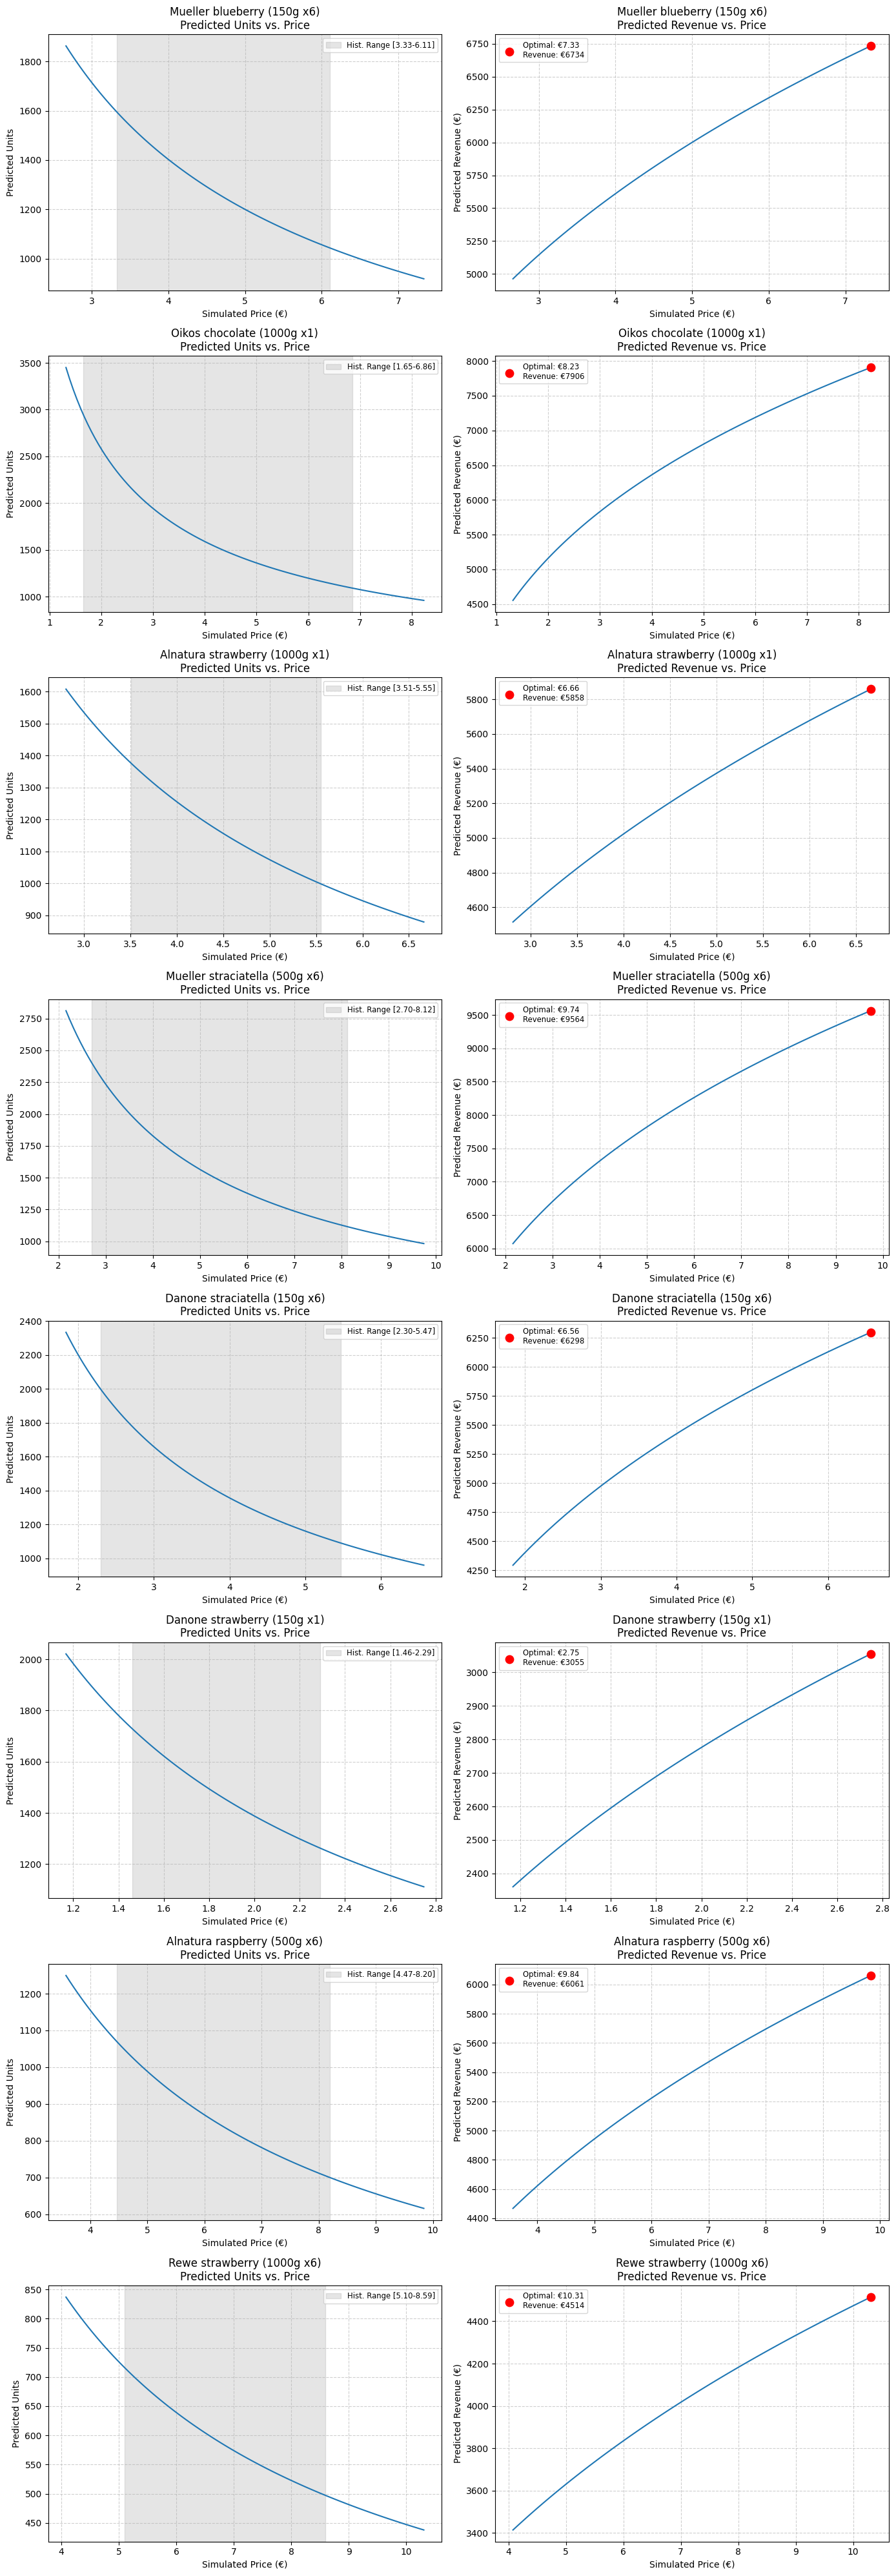

   Subset plots generated and displayed.

--- Task 3 - Step 8 Completed ---


In [12]:
# --- Task 3 - Step 8: Visualize Results (Subset) ---

print("\n--- Starting Task 3 - Step 8: Visualize Results ---")

# Check if the combined DataFrame exists and has data
if 'all_simulation_results' not in locals() or all_simulation_results.empty:
    print("   ❌ Cannot generate plots: 'all_simulation_results' is missing or empty.")
else:
    # Get the unique IDs of products that were successfully simulated
    simulated_product_ids = all_simulation_results['product_id'].unique()
    num_simulated_products = len(simulated_product_ids)

    # --- Define Subset for Plotting ---
    # Plot a maximum number of products to keep the visualization manageable
    max_plots_to_show = min(num_simulated_products, 8) # Adjust '8' if you want more/fewer plots
    # Select the product IDs for the subset (e.g., the first ones found)
    plot_ids_subset = simulated_product_ids[:max_plots_to_show]
    print(f"   Plotting results for the first {len(plot_ids_subset)} simulated product(s)...")
    # --- End Subset Definition ---

    # Create the figure; size depends on how many products we plot
    plt.figure(figsize=(14, 5 * len(plot_ids_subset)))

    # Loop through ONLY the subset of product IDs selected for plotting
    for i, product_id in enumerate(plot_ids_subset):
        # Filter the main results DataFrame for the current product ID
        prod_results = all_simulation_results[all_simulation_results['product_id'] == product_id]
        if prod_results.empty: continue # Should not happen, but safety check

        # Get the product description for titles
        product_desc = prod_results['product_desc'].iloc[0]

        # --- Plot 1: Units vs. Price ---
        ax1 = plt.subplot(len(plot_ids_subset), 2, 2*i + 1) # Position subplot
        sns.lineplot(data=prod_results, x='simulated_price', y='predicted_units', ax=ax1, errorbar=None)
        ax1.set_title(f'{product_desc}\nPredicted Units vs. Price')
        ax1.set_xlabel("Simulated Price (€)"); ax1.set_ylabel("Predicted Units")
        ax1.grid(True, linestyle='--', alpha=0.6)
        # Optional: Add historical price range
        hist_prices = clean_data[clean_data['product_id'] == product_id]['price']
        if not hist_prices.empty:
            min_p, max_p = hist_prices.min(), hist_prices.max()
            ax1.axvspan(min_p, max_p, color='gray', alpha=0.2, label=f'Hist. Range [{min_p:.2f}-{max_p:.2f}]')
            ax1.legend(fontsize='small')

        # --- Plot 2: Revenue vs. Price ---
        ax2 = plt.subplot(len(plot_ids_subset), 2, 2*i + 2) # Position subplot
        sns.lineplot(data=prod_results, x='simulated_price', y='predicted_revenue', ax=ax2, errorbar=None)
        # Mark the optimal point (if revenue is valid)
        if not prod_results['predicted_revenue'].isnull().any() and not np.isinf(prod_results['predicted_revenue']).any():
             optimal_idx = prod_results['predicted_revenue'].idxmax()
             optimal_price = prod_results.loc[optimal_idx, 'simulated_price']
             max_revenue = prod_results.loc[optimal_idx, 'predicted_revenue']
             ax2.scatter(optimal_price, max_revenue, color='red', s=80, zorder=5,
                         label=f'Optimal: €{optimal_price:.2f}\nRevenue: €{max_revenue:.0f}')
             ax2.legend(fontsize='small')
        ax2.set_title(f'{product_desc}\nPredicted Revenue vs. Price')
        ax2.set_xlabel("Simulated Price (€)"); ax2.set_ylabel("Predicted Revenue (€)")
        ax2.grid(True, linestyle='--', alpha=0.6)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()
    print("   Subset plots generated and displayed.")

print("\n--- Task 3 - Step 8 Completed ---")

In [13]:
# --- Task 3 - Step 9: Interpretation and Business Context ---

print("\n--- Starting Task 3 - Step 9: Interpretation & Business Context ---")

# Check if the combined results exist and are not empty
if 'all_simulation_results' not in locals() or all_simulation_results.empty:
     print("\n❌ No simulation results available to interpret.")
else:
    # --- Summarize Optimal Points ---
    # Find the row corresponding to the maximum predicted revenue for each product_id
    # Use .loc[...] to get a DataFrame and .copy() to avoid SettingWithCopyWarning
    optimal_summary = all_simulation_results.loc[all_simulation_results.groupby('product_id')['predicted_revenue'].idxmax()].copy()

    # Add brand information back for grouping/sorting
    # Merge with the products_to_simulate_df which contains details
    optimal_summary = optimal_summary.merge(
        products_to_simulate_df[['product_id', 'brand']],
        on='product_id',
        how='left'
    )

    print("\n✅ Summary of Predicted Optimal Points (Sorted by Brand, then Revenue):")

    # Sort the summary table for better readability
    optimal_summary = optimal_summary.sort_values(by=['brand', 'predicted_revenue'], ascending=[True, False])

    # Print the optimal point for each product, grouped by brand visually
    current_brand = ""
    for idx, row in optimal_summary.iterrows():
        if row['brand'] != current_brand:
            current_brand = row['brand']
            print(f"\n--- Brand: {current_brand} ---")

        # --- Optional: Recalculate Historical Avg for Comparison ---
        hist_data_prod = clean_data[clean_data['product_id'] == row['product_id']].copy()
        avg_hist_revenue = 0; avg_hist_revenue_str="N/A"; potential_increase_str = "N/A"
        if not hist_data_prod.empty:
             hist_data_prod['revenue'] = hist_data_prod['price'] * hist_data_prod['units']
             avg_hist_revenue = hist_data_prod['revenue'].mean()
             if avg_hist_revenue and avg_hist_revenue > 0 and np.isfinite(avg_hist_revenue): # Check validity
                 avg_hist_revenue_str = f"€{avg_hist_revenue:.2f}"
                 if np.isfinite(row['predicted_revenue']): # Check prediction is valid
                     revenue_increase_pct = ((row['predicted_revenue'] - avg_hist_revenue) / avg_hist_revenue * 100)
                     potential_increase_str = f"{revenue_increase_pct:+.1f}%"
                 else: potential_increase_str = "N/A (Pred Rev Invalid)"
             else: avg_hist_revenue_str = "€0.00 or invalid"
        # --- End Comparison ---

        print(f"* {row['product_desc']} (ID: {row['product_id']})")
        print(f"  - Optimal Price: €{row['simulated_price']:.2f} -> Max Revenue: €{row['predicted_revenue']:.2f} (Units: {row['predicted_units']:.0f})")
        print(f"  - Hist. Avg Revenue: {avg_hist_revenue_str} | Potential Change: {potential_increase_str}")

    # --- General Business Implications and Limitations Discussion ---
    print("\n\n--- Business Implications ---")
    print("- The analysis provides revenue-maximizing price point *suggestions* across different products and brands based on the model.")
    print("- Observed differences in optimal prices and potential revenue gains can indicate varying price sensitivities or market positions.")
    print("- This allows comparison between products and can inform portfolio-level pricing strategies (e.g., identifying products with high/low pricing power according to the model).")
    print("- These findings should be treated as data-driven starting points for business decisions, requiring further validation (e.g., A/B tests) and integration with market knowledge.")

    print("\n--- Important Considerations & Limitations ---")
    print(f"- **Model Used:** OLS predicting log(units) based on log(price) and brand/flavour dummies.")
    print("- **Model Accuracy:** Reliability hinges on the Task 2 model's fit (R-squared: {model.rsquared:.3f}) and validity. A single model across all products might oversimplify; individual product models could potentially be more accurate but complex.")
    print("- **Constant Elasticity:** Assumes elasticity ({model.params['log_price']:.2f}) is constant. May not hold at extreme price points.")
    print("- **Static Environment:** Assumes competitor actions, promotions, seasonality, etc., remain constant.")
    print("- **Data Scope:** Limited by factors included in the dataset. Does not account for advertising, placement, stock-outs, etc.")
    print("- **Extrapolation:** Predictions outside historical price ranges are less certain.")
    print("- **Revenue vs. Profit:** Optimizes revenue, not profit (requires cost data).")
    print("- **Cross-Product Effects:** Ignores cannibalization/halo effects between products. Changing one price affects others.")
    print("- **Implementation:** Real-world price changes have practical constraints.")

print("\n--- Task 3 - Step 9 Completed ---")
print("\n--- Task 3 FULLY Completed ---")


--- Starting Task 3 - Step 9: Interpretation & Business Context ---

✅ Summary of Predicted Optimal Points (Sorted by Brand, then Revenue):

--- Brand: Actimel ---
* Actimel blueberry (1000g x6) (ID: 19)
  - Optimal Price: €10.92 -> Max Revenue: €5132.66 (Units: 470)
  - Hist. Avg Revenue: €5015.87 | Potential Change: +2.3%

--- Brand: Activia ---
* Activia straciatella (500g x6) (ID: 23)
  - Optimal Price: €9.66 -> Max Revenue: €6863.18 (Units: 710)
  - Hist. Avg Revenue: €6112.29 | Potential Change: +12.3%
* Activia blueberry (1000g x6) (ID: 9)
  - Optimal Price: €9.67 -> Max Revenue: €5266.73 (Units: 545)
  - Hist. Avg Revenue: €4719.85 | Potential Change: +11.6%

--- Brand: Alnatura ---
* Alnatura straciatella (150g x6) (ID: 8)
  - Optimal Price: €6.24 -> Max Revenue: €9109.93 (Units: 1460)
  - Hist. Avg Revenue: €5880.91 | Potential Change: +54.9%
* Alnatura raspberry (500g x6) (ID: 6)
  - Optimal Price: €9.84 -> Max Revenue: €6061.33 (Units: 616)
  - Hist. Avg Revenue: €6188.86 